In [ ]:
# Description

# datetime - hourly date + timestamp
# season - 1=spring, 2=summer, 3=fall, 4=winter
# holiday - whether the day is cosidered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather
# 1:Clear, Few clouds
# 2:Mist + Cloudy
# 3:Light Snow, Light Rain
# 4:Heavy Rain + Ice Pallets + Thunderstorm + Fog
# temp - temperature in Celsius
# atemp - 'feels like' temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

# Evaluation
# Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

In [ ]:
# 분류와 회귀중 자전거 대여량을 예측하는 문제이기 때문에 회귀문제.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 한글 폰트 깨지는 문제 대처
# 한글폰트 깨지는거 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 데이터 로드하기위해 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/working_drive')

import os

working_dir = 'bike-sharing-demand'

colab_default_dir = '/content/working_drive/MyDrive/Colab Notebooks/BT/캐글 실습으로 배우는 데이터 사이언스/data'

original_dir = os.getcwd() # save current dir

try :
  os.chdir(colab_default_dir)
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir) # change working dir
  print('current dir =', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

Drive already mounted at /content/working_drive; to attempt to forcibly remount, call drive.mount("/content/working_drive", force_remount=True).
current dir = /content/working_drive/MyDrive/Colab Notebooks/BT/캐글 실습으로 배우는 데이터 사이언스/data/bike-sharing-demand


In [ ]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
# train.columns
# train.dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.head(20)
# 풍속이 0인 값들은 입력이 안된것은 아닐까 생각해서 값을 정해줘야겠다는 생각을 할 수 있음.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


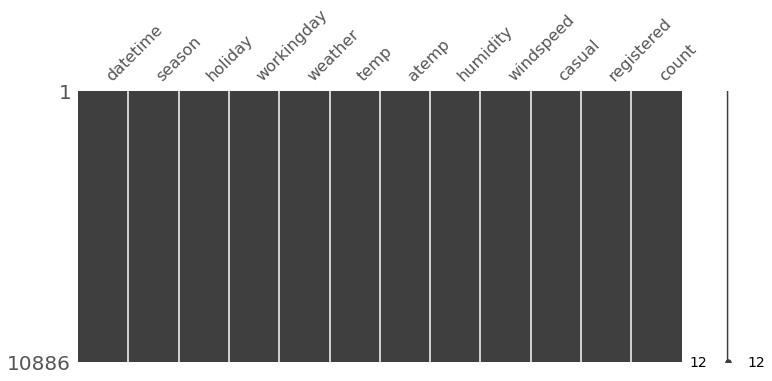

In [ ]:
# null인 데이터가 있는지 시각화해주는 툴
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

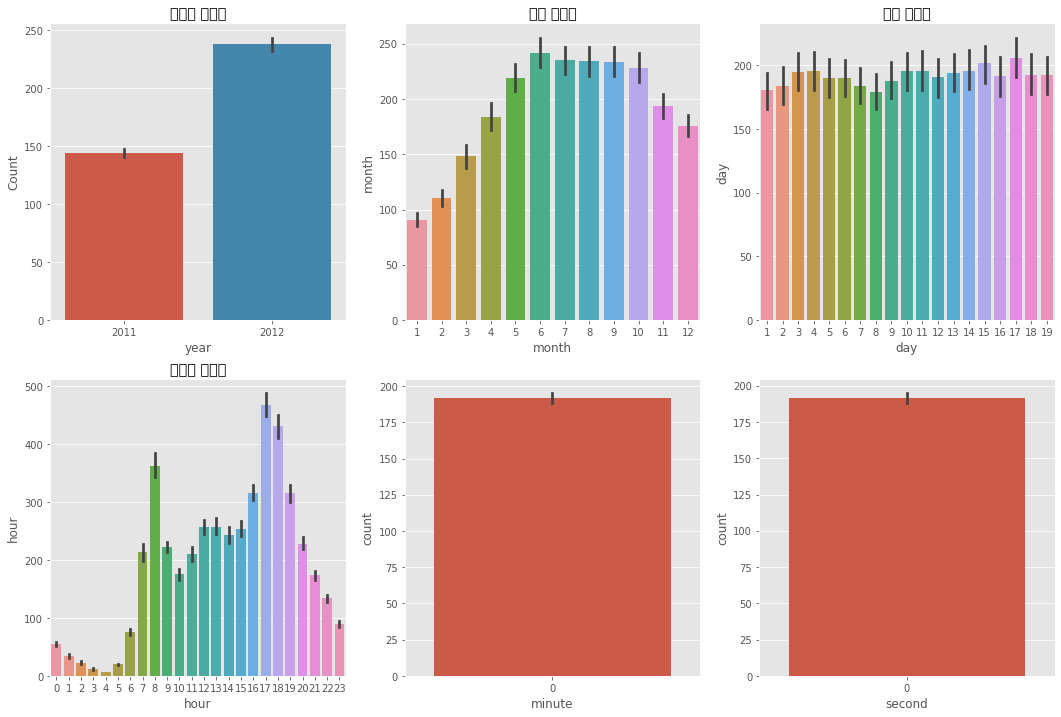

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='month', title='월별 대여량')
ax3.set(ylabel='day', title='일별 대여량')
ax4.set(ylabel='hour', title='시간별 대여량')
# 1년간에 사용량이 늘어났고 날씨가 따듯할 때 대여량이 높은것으로 보여짐
# 일별 대여량은 19일까지만 있기 때문에 feature로 사용하기 어려움 (train에서 19일까지 test에서 19일 이후 데이터가 존재)
# 새벽시간대에는 극도로 대여량이 적은걸 볼 수 있음
# 분, 초 단위로는 feature사용이 어려워보인다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

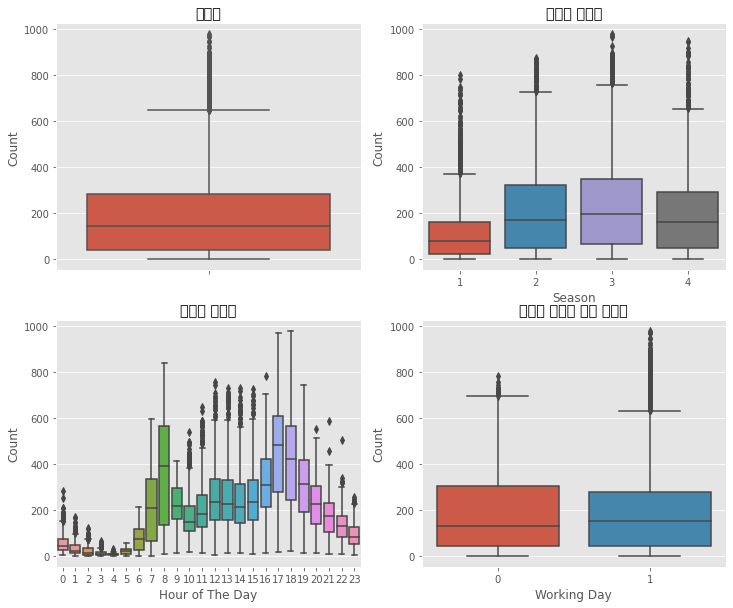

In [ ]:
# 계절, 시간 ,일하는날 기준으로 그래프 보기

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count', orient='v',ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v',ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v',ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='Count', title='대여량')
axes[0][1].set(xlabel='Season', ylabel='Count', title='계절별 대여량')
axes[1][0].set(xlabel='Hour of The Day', ylabel='Count', title='시간별 대여량')
axes[1][1].set(xlabel='Working Day', ylabel='Count', title='근무일 여부에 따른 대여량')

# 계절별로 차이가 있고 , 휴일에 좀더 대여량이 많은걸로 보임

In [ ]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [ ]:
# 요일에 따른 데이터
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

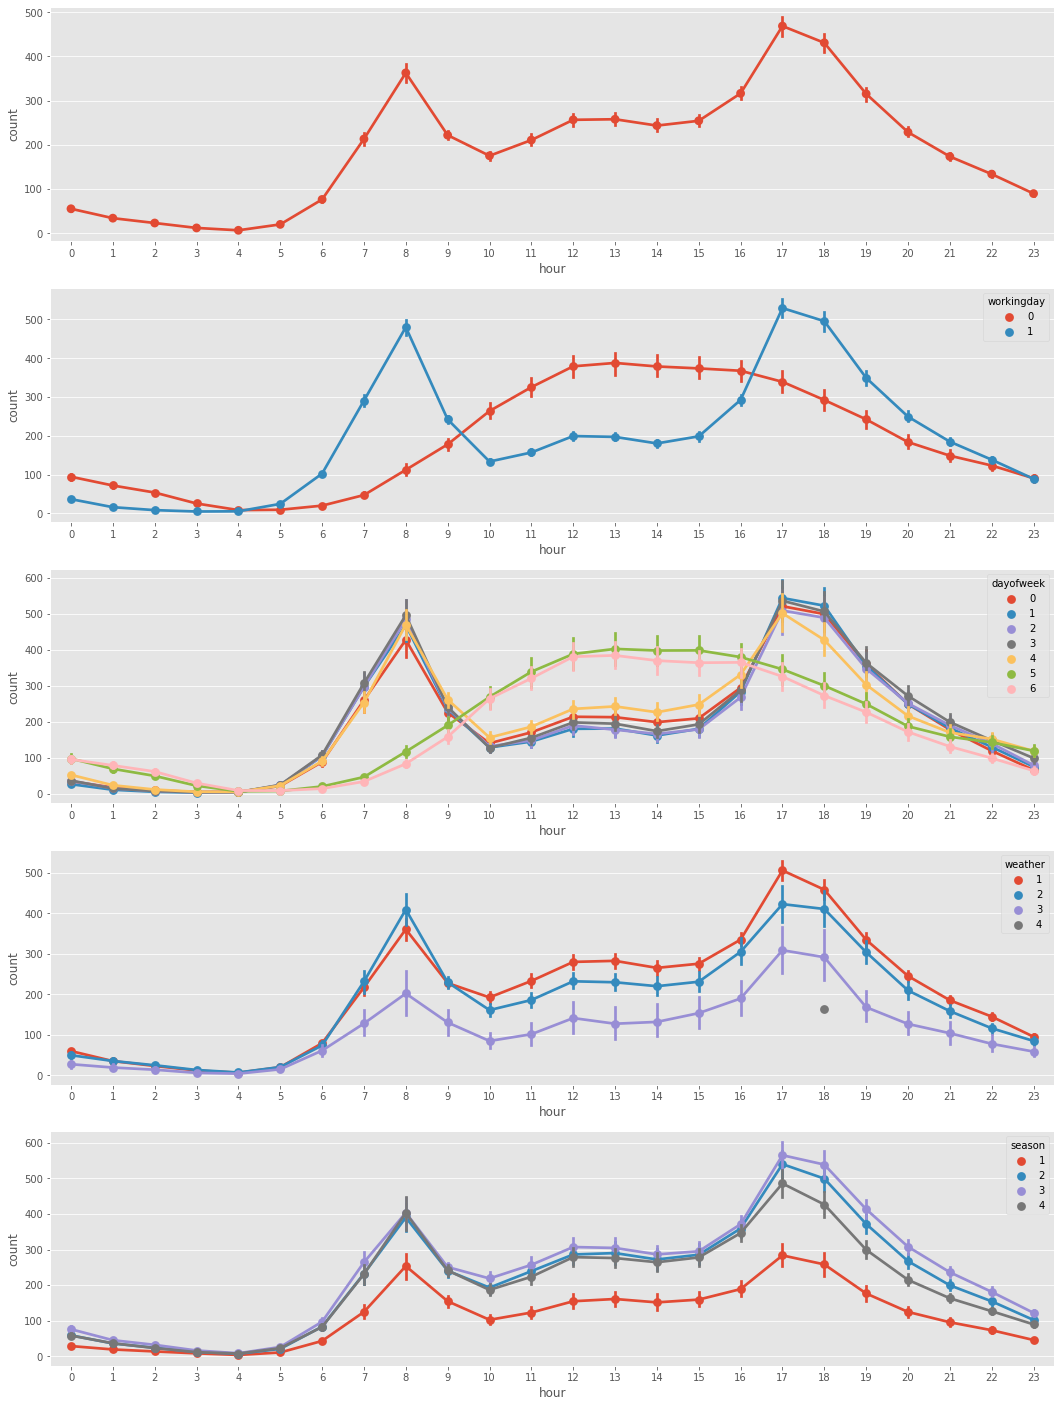

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count',ax=ax1)

sns.pointplot(data=train, x='hour', y='count', hue='workingday',ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek',ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather',ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season',ax=ax5)

# 월~금 까지는 출퇴근용, 휴일엔 오후 산책용으로 많이 탄다는 것을 추측할 수 있다.

In [ ]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


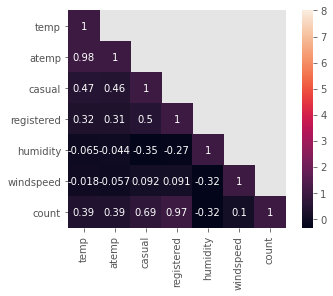

In [ ]:
fig.ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=8, square=True, annot=True)
# 온도, 습도, 풍속은 거의 연관관계가 없다.
# 대여량과 가장 연관이 높은건 registered로 등록된 대여자가 많지만, test 데이터에는 이 값이 없다.
# atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도를 피처로 사용하기에 적합하지 않을 수 있다.
# (둘다 거의 상관관계가 같아 같은 데이터로 보여짐)

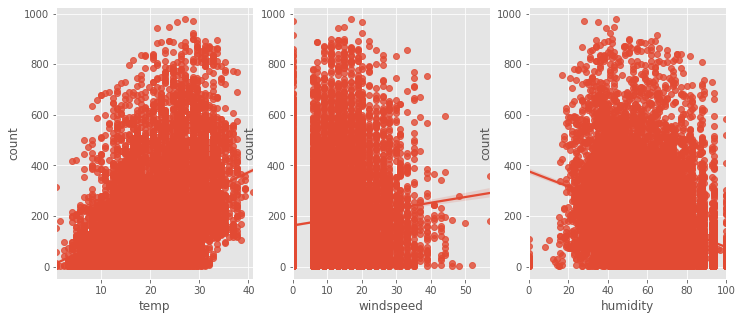

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)

fig.set_size_inches(12,5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)
# 산점도로 분석한 결과 풍속이 0인 데이터가 많기 때문에 정제를 해줘야 결과 예측이 더 높음

In [ ]:
# 년월을 붙여 봐보기 
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


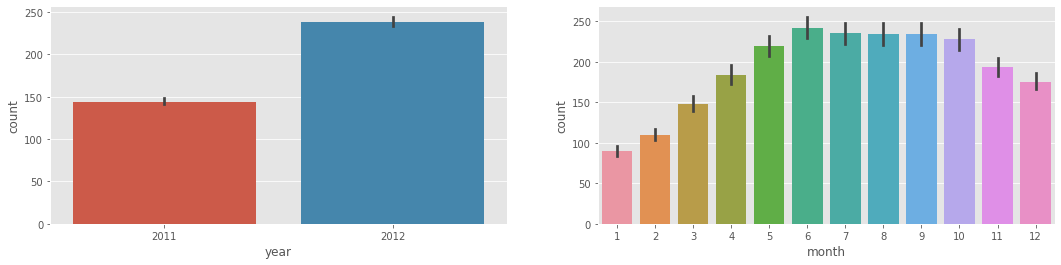

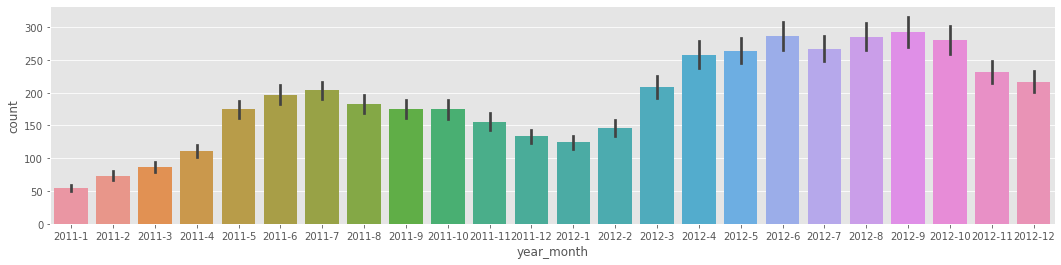

In [ ]:
# 2011년보다 2012년의 대여량이 더 많기 때문
# 겨울보다 여름의 대여량이더 많고
# 월별데이터를 전체적으로 이어보면 증가하는 추세

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count',ax=ax1)
sns.barplot(data=train, x='month', y='count',ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [ ]:
# trainWithoutOutliers
# 너무 튀는 값의 데이터들을 제거하고 분석하기!
# count 값의 데이터 분포도를 파악

trainWithoutOutliers = train[np.abs(train['count']- train['count'].mean()) <= (3*train['count'])]

print(train.shape)
print(trainWithoutOutliers.shape)
# 150개정도의 튀는 값들을 없앰.

(10886, 20)
(8001, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119485))

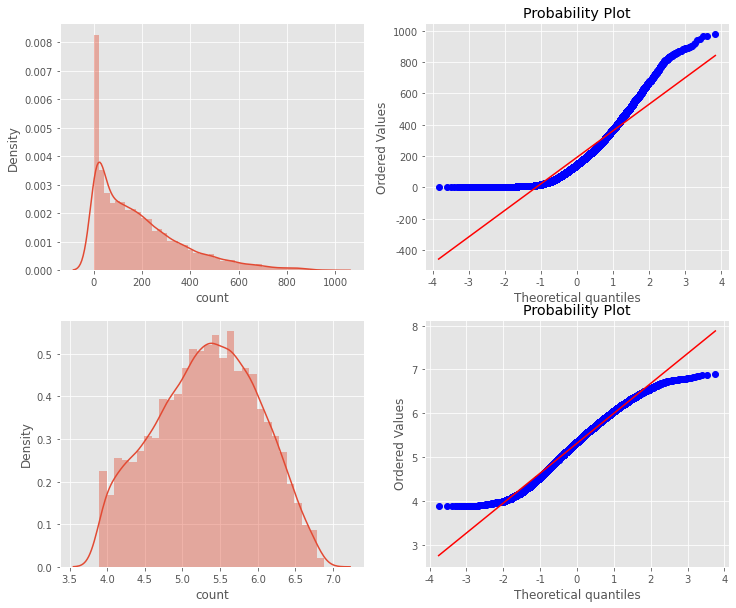

In [ ]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit=True, plot=axes[1][1])

In [ ]:
# 사이킷런으로 머신러닝 흐름을 알기
# scikit-learn algorithm cheat-sheet을 보면 사용법을 대강 알 수 있다.
# 타이타닉 문제 -> classification
# 회귀(수량 등의)문제 -> regression



# 이 강의에선 randomforest와 여러 다른 것들을 이용할 예정######################################################
# 하나씩 살펴보자.



# Supervised Machine Learning
# training data, training labels -> model(training) 
# -> testdata / prediction -> evaluation(with test labels)

# 예시코드!
# clf = RandomForestClassifier()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(X_test)
# clf.score(X_test, y_test)

# RandomForest의 설명
# Decision Trees란 
# 값이 맞는지틀리는지에 노드에 따라 depth깊게 들어가면서 최적화 값을 찾는 과정, 속도가 빠름
# 이 Decision Tree의 장점을 모아서 보다 더 좋은 성능을 내는게 RandomForest이다.
# 여러 Decision간에 투표를 해서 결과를 예측하는 알고리즘이다.
# UnderFitting / OverFitting
# 너무 적은 합습은 데이터의 특징과 다양성을 못잡아내고
# 너무 많은 학습은 복잡한 모델을 말들어 일반화하기가 어려워지므로 -> feature를 너무 많이 넣는다고 좋은것이 아님.
# 최적점을 찾는 과정이 중요함.

# RMSLE는
# 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.
# 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높음.
# 0에 가까운 값이 나올 수록 정밀도가 높은 편이다.
# 로그그래프를 보면 이해가 쉽다.

# EDA & Ensemble Model
# RMSLE를 코드로 표현하면??

# def rmsle_ez(y, y_, convertExp=True):
#   if convertExp:
#     y = np.exp(y),
#     y_ = np.exp(y_)
#   log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
#   log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
#   calc = (log1 - log2) ** 2
#   return np.sqrt(np.mean(calc))

# 코드를 이해하기 쉽게 풀어서 쓰면??
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
  # 넘파이를 배열 형태로 바꿔줌.
  predicted_values = np.array(predicted_values)
  actual_values = np.array(actual_values)

  # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
  log_predict = np.log(predicted_values + 1)
  log_actual = np.log(actual_values + 1)

  # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
  # difference =  (log_predict - log log_actual) **2 도 가능
  difference = log_predict - log_actual
  difference = np.square(difference)
  
  # 평균을 낸다.
  mean_difference = difference.mean()

  # 다시 루트를 씌운다.
  score = np.sqrt(mean_difference)

  return score

# Cross Validation 교차 검증을 사용할 예정 (k-fold 교차검증)
# 1,2,3,4 로 데이터를 나눠서 차례로 test데이터를 하나로 지정하며 테스트를 진행해
# k=4 네번의 정확도를 측정해 평균값을 매겨 정확도를 계산


In [ ]:
# 랜덤포레스트로 자전거 수요량 회귀 예측해보기
# Load Dataset

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
# Feature Engineering
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

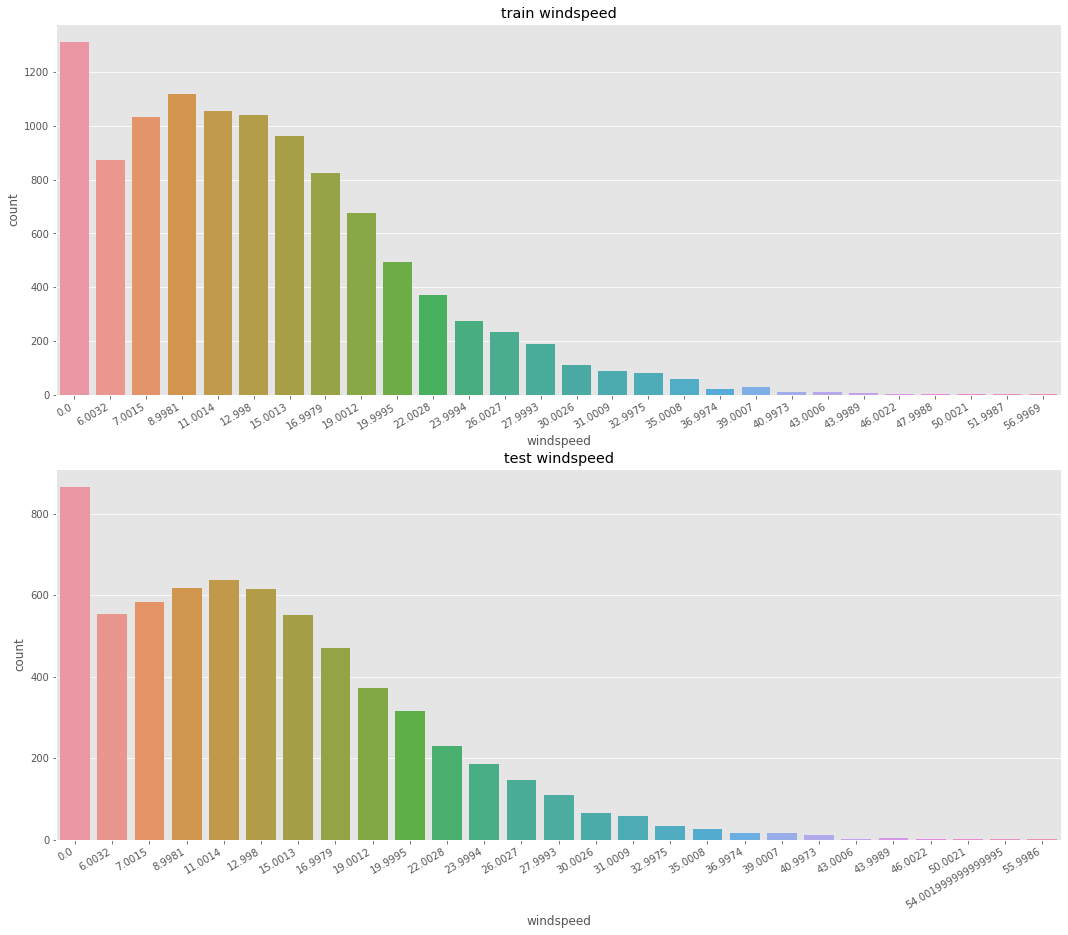

In [ ]:
# windspeed 풍속에 0값이 가장 많다. -> 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='train windspeed')  
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='test windspeed')  
sns.countplot(data=test, x='windspeed', ax=axes[1])

# 그래프를 보고 풍속이 0인 값들은 측정이 제대로 되지않았기에 그렇지 않을까 예측해볼 수 있다.

In [ ]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수 있지만, 예측의 정확도를 높이는데 도움이 될 것 같지는 않음
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed']== 0]
trainWindNot0 = train.loc[train['windspeed']!= 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):

  # 풍속이 0인것과 아닌 것을 나누어 준다.
  dataWind0 = data.loc[data['windspeed']==0]
  dataWindNot0 = data.loc[data['windspeed']!=0]

  # 풍속이 예측할 피처를 선택한다.
  wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
  
  # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
  dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

  # 랜덤포레스트 분류기를 사용한다.
  rfModel_wind = RandomForestClassifier()

  # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
  rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
  
  # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
  wind0Values = rfModel_wind.predict(X= dataWind0[wCol])

  # 값을 다 예측 후 비교해 보기 위해
  # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
  predictWind0 = dataWind0
  predictWindNot0 = dataWindNot0

  # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
  predictWind0['windspeed'] = wind0Values
  
  # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터 프레임을 합쳐준다.
  data = predictWindNot0.append(predictWind0)

  # 풍속의 데이터타입을 float으로 지정해 준다.
  data['windspeed'] = data['windspeed'].astype('float')

  data.reset_index(inplace=True)
  data.drop('index', inplace=True, axis=1)

  return data

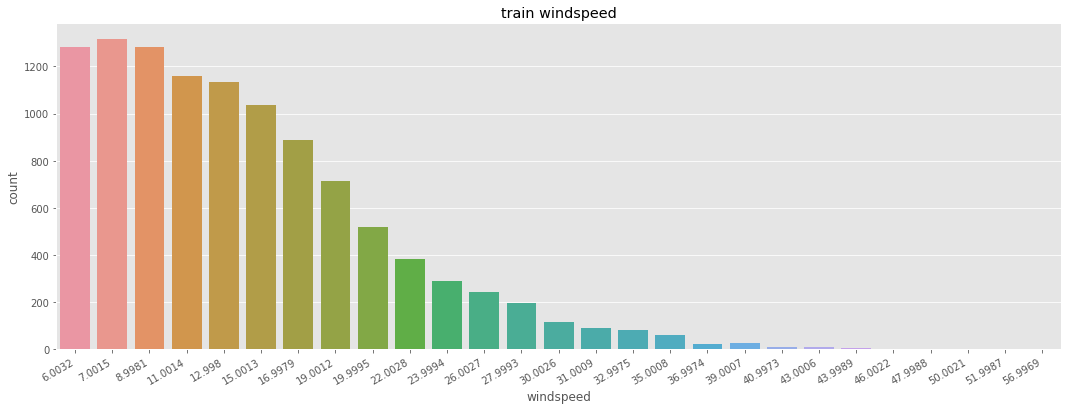

In [ ]:
# 0값을 조정한다.
train = predict_windspeed(train)

# windspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)

In [ ]:
# Feature Selection
# 신호와 잡음을 구분해야 한다.
# 피처가 많다고 무조건 좋은 성능을 내진 않음.
# 피처를 하나씩 추가하고 변경해가면서 성능이 좋지않은 피처는 제거하도록 한다.

In [ ]:
# 연속형 feature와 범주형 feature
# 연속형 - 온도,바람세기
# 범주형 - 계절, 시즌, 날씨(1,2,3,4) 원핫인코 사용함
# 범주형 데이터가 머신러닝이 이해하기 쉽도록 인코딩을 해줌 -> 카테고리 타입으로 바꾸기

categorical_feature_names = ['season', 'holiday', 'workingday', 'weather','dayofweek',
                             'month', 'year', 'hour']

for var in categorical_feature_names:
  train[var]= train[var].astype('category')
  test[var] = test[var].astype('category')

feature_names = ['season','weather','temp', 'atemp', 'humidity', 'windspeed', 'year',
                 'hour', 'dayofweek', 'holiday', 'workingday']
                
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [ ]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(10886, 11)
(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [ ]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()
# 이 train의 x와 y데이터로 학습예정

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [ ]:
# SCORE
# 이 경진대회는 RMSLE라는 평가방법을 사용함
# 과대평가된 항목보다는 과소평가 된 항목에 패널티를 줌
# 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RAND0MFOREST

from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
# n_estimator값을 높일수록 더 좋은 성능을 내지만 예측시간이 오래걸림

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# 시간측정
from sklearn.metrics import make_scorer
rmsle_scorer = make_scorer(rmsle)

%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print('Score= {0:.5f}'.format(score))

CPU times: user 2.44 s, sys: 467 ms, total: 2.9 s
Wall time: 22.3 s
Score= 0.33081


In [ ]:
# Train 학습시키기
# 학습시킴, 피팅(옷을 입을 때 사용하는 피딩을 생각함) - 피처와 레이블을 넣어주면 알아서 학습
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.76,   5.11,   4.22,   3.46,   3.12,   6.28,  38.3 , 105.8 ,
       237.23, 137.15])

[Text(0.5, 1.0, 'test')]

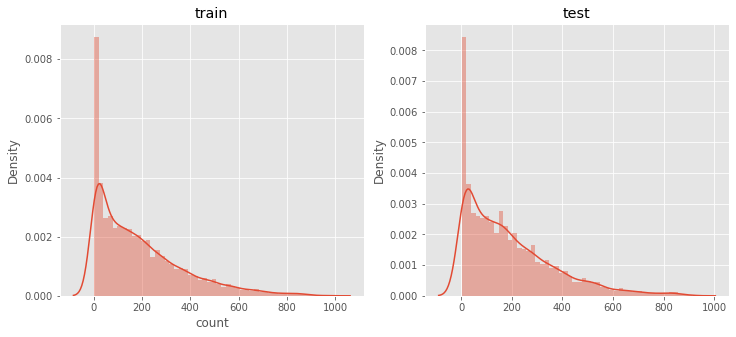

In [ ]:
# 예측한 데이터를 시각화 해봄
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(y_train,ax= ax1, bins=50)
ax1.set(title='train')
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title='test')

In [ ]:
# Submit 제출!
submission = pd.read_csv('sampleSubmission.csv')
submission

submission['count'] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.76
1,2011-01-20 01:00:00,5.11
2,2011-01-20 02:00:00,4.22
3,2011-01-20 03:00:00,3.46
4,2011-01-20 04:00:00,3.12


In [ ]:
submission.to_csv('Score_{0:.5f}_submission.csv'.format(score), index=False)

In [ ]:
# 제출할 때 파일 제목에 스코어를 적어주는것, 메모에 어떤 메소드를 사용하였는지
# 서술해주면 좋음!!

In [ ]:
# 다양한 모델 사용해 상위 5%이내 점수 얻기
# 앙상블, 회귀기법으로 점수 제출해보기

train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [ ]:
# 연속형 feature와 범주형 feature
# 연속형 - 온도,바람세기
# 범주형 - 계절, 시즌, 날씨(1,2,3,4) 원핫인코 사용함
# 범주형 데이터가 머신러닝이 이해하기 쉽도록 인코딩을 해줌 -> 카테고리 타입으로 바꾸기

categorical_feature_names = ['season', 'holiday', 'workingday', 'weather','dayofweek',
                             'month', 'year', 'hour']

for var in categorical_feature_names:
  train[var]= train[var].astype('category')
  test[var] = test[var].astype('category')

feature_names = ['season','weather','temp', 'atemp', 'humidity', 'year',
                 'hour', 'dayofweek', 'holiday', 'workingday']
                
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [ ]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [ ]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [ ]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()
# 이 train의 x와 y데이터로 학습예정

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
# rmsle 정의필요!

In [ ]:
# 선형회귀 모델 (Linear Regression Model)
# 선형회귀또는 최소제곱법은 가장 간단함
# MSE를 최소화 하는 파라미터 W와 b를 찾는과정.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train)
print('RMSLE Value For Linear Regression: ',
      rmsle(np.exp(y_train_log), np.exp(preds)))

RMSLE Value For Linear Regression:  0.9803697923313522


In [ ]:
# 릿지 Regularization Model - 회귀를 위한 선형 모델
# 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
# Regularization(규제)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
# max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780834


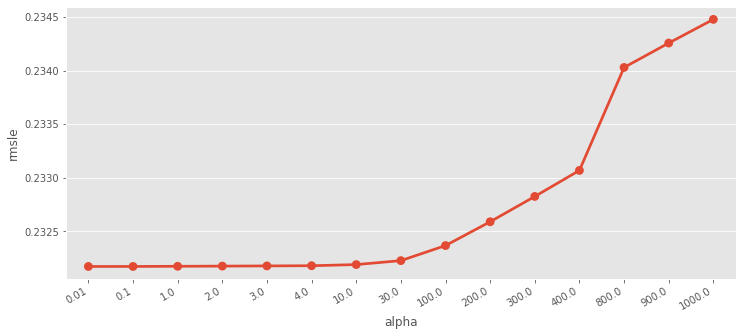

In [ ]:
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000], 'alpha':[0.01, 0.1, 1,2,3,4,10,30,100,200,300,400,800,900,1000]} # max_iter 반복하는 최대횟수
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring = rmsle_scorer, cv=5) # 최적의 알파값 찾기

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
preds = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print('RMSLE Value For Ridge Regression: ', rmsle(np.exp(y_train_log),np.exp(preds)))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x:x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x: -x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803736954998908


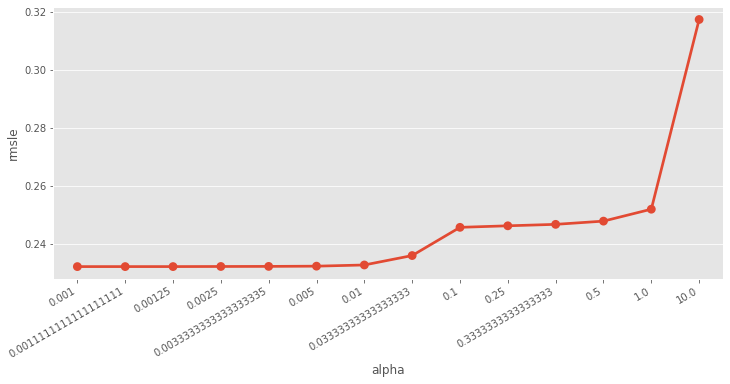

In [ ]:
# 라쏘 LASSO Model
# 선형회귀의 규제를 적용하는 대안
# 피처선택이 자동으로 이루어진다고 볼 수 있다.
# alpha의 기본 값은 1.0이며 , 과소 적합을 줄이기 위해서는 이값을 줄여야 함
# 그리드 서치로 아래 모델을 실행했을 때 베스트 알파값은

lasso_m_ = Lasso()

alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_,scoring= rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)
preds = grid_lasso_m.predict(X_train)
print(grid_lasso_m.best_params_)
print('RMSLE Value For Lasso Regression: ',rmsle(np.exp(y_train_log), np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x:x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha',y='rmsle', ax=ax)

In [ ]:
# 앙상블모델 - 랜덤포레스트
# Ensemble Models - Random Forest

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print('RMSLE Value For Random Forest: ', score)


RMSLE Value For Random Forest:  0.10731941377970261


In [ ]:
# 앙상블모델 - 그라디언트 부스트
# 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
# 회귀와 분류에 모두 사용할 수 있음
# 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
# 무작위성이 없고 강력한 사전 가지치기가 사용됨
# 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
# learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
# n_estimateor의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를
# 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수 있다.
# max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha = 0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print('RMSLE Value For Gradient Boost: ',score)

# 보면 랜덤포레스트가 더 효과적임

RMSLE Value For Gradient Boost:  0.2135740372724937


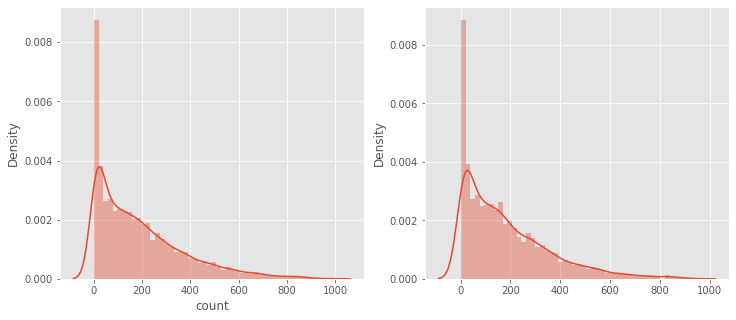

In [ ]:
# 랜덤포레스트로 예측했을 때 그래프
predsTest = rfModel.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1, bins=50) # 정답값
sns.distplot(np.exp(predsTest),ax=ax2, bins=50) # 예측값

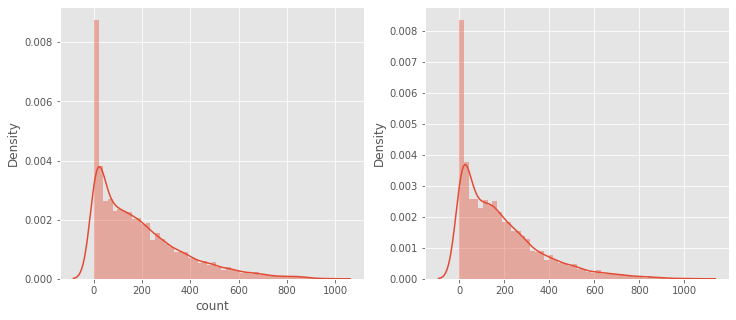

In [ ]:
# 그라디언트 부스트 모델로 예측했을 때 그래프
predsTest = gbm.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1, bins=50) # 정답값
sns.distplot(np.exp(predsTest),ax=ax2, bins=50) # 예측값

In [ ]:
# Submit한다면
submission = pd.read_csv('sampleSubmission.csv')
submission

submission['count']= np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918


In [ ]:
submission.to_csv('Score_{0:.5f}_submission.csv'.format(score), index=False)
# 결과물 정확도를 파일에 저장!

In [ ]:
# 저장한 파일을 Kaggle Late Submission에 제출!하고 Leaderboard에서 순위찾기